# Load and plot LWFA radiation data 

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

import h5py as h5

import sys
sys.path.append('../main/ModelHelpers/cINN/model')

from modules.data_preprocessing import h5_tree
from modules import radiation

path_to_all_simulations = "/bigdata/hplsim/production/LWFA_radiation_new/LWFArad_data_example/LWFArad_data_example/radiationOpenPMD/"
paths_to_simulation_files = [path_to_all_simulations + directory for directory in os.listdir(path_to_all_simulations)]

for f_ in paths_to_simulation_files:
    print(f_)
#

/bigdata/hplsim/production/LWFA_radiation_new/LWFArad_data_example/LWFArad_data_example/radiationOpenPMD/e_radiation_11000_0_0_0.h5
/bigdata/hplsim/production/LWFA_radiation_new/LWFArad_data_example/LWFArad_data_example/radiationOpenPMD/e_radiation_10900_0_0_0.h5
/bigdata/hplsim/production/LWFA_radiation_new/LWFArad_data_example/LWFArad_data_example/radiationOpenPMD/e_radiation_10800_0_0_0.h5
/bigdata/hplsim/production/LWFA_radiation_new/LWFArad_data_example/LWFArad_data_example/radiationOpenPMD/e_radiation_10500_0_0_0.h5
/bigdata/hplsim/production/LWFA_radiation_new/LWFArad_data_example/LWFArad_data_example/radiationOpenPMD/e_radiation_10300_0_0_0.h5
/bigdata/hplsim/production/LWFA_radiation_new/LWFArad_data_example/LWFArad_data_example/radiationOpenPMD/e_radiation_10600_0_0_0.h5
/bigdata/hplsim/production/LWFA_radiation_new/LWFArad_data_example/LWFArad_data_example/radiationOpenPMD/e_radiation_10700_0_0_0.h5
/bigdata/hplsim/production/LWFA_radiation_new/LWFArad_data_example/LWFArad_d

In [2]:
all_radiation = []
for f_ in paths_to_simulation_files:
    all_radiation.append(radiation.RadiationData(f_))

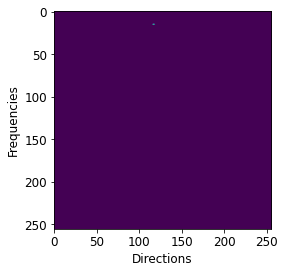

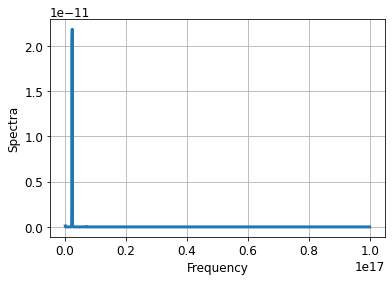

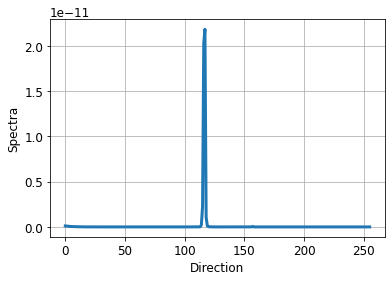

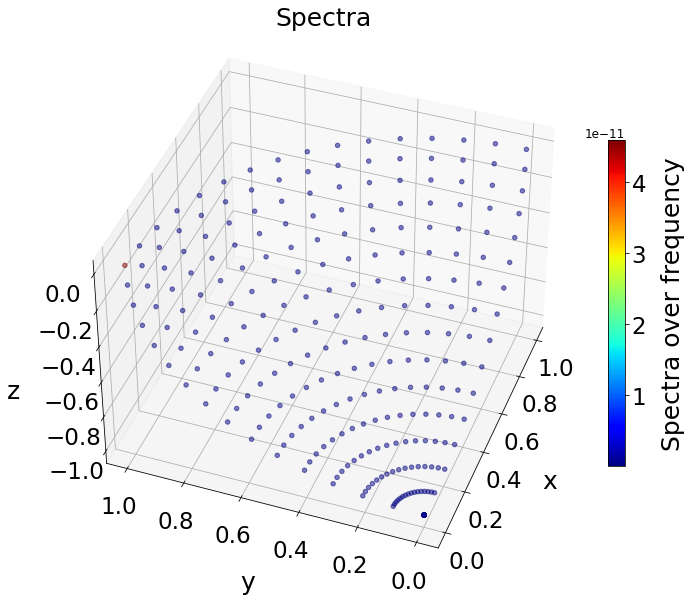

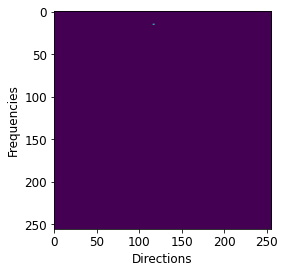

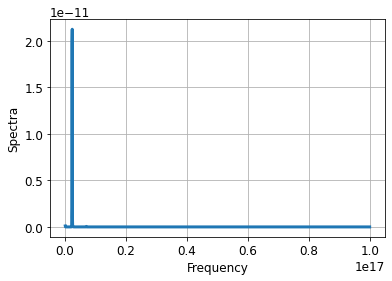

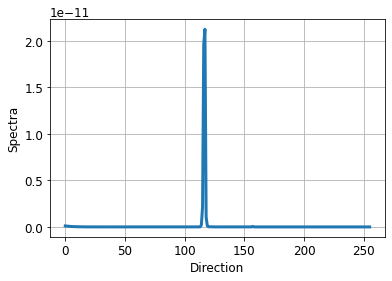

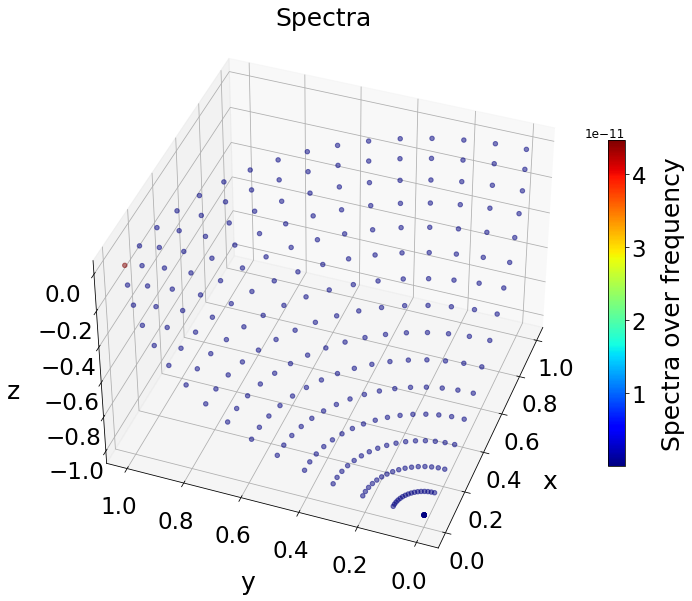

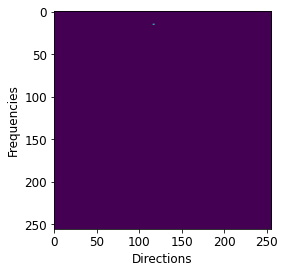

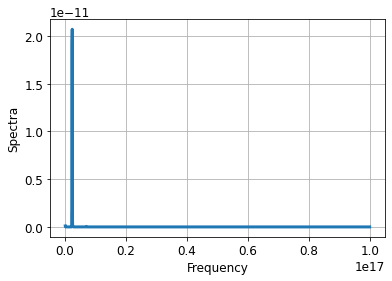

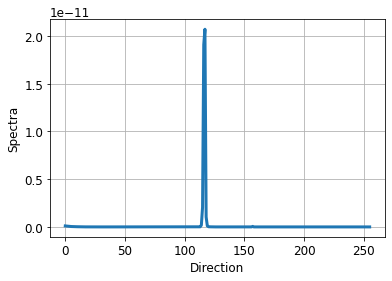

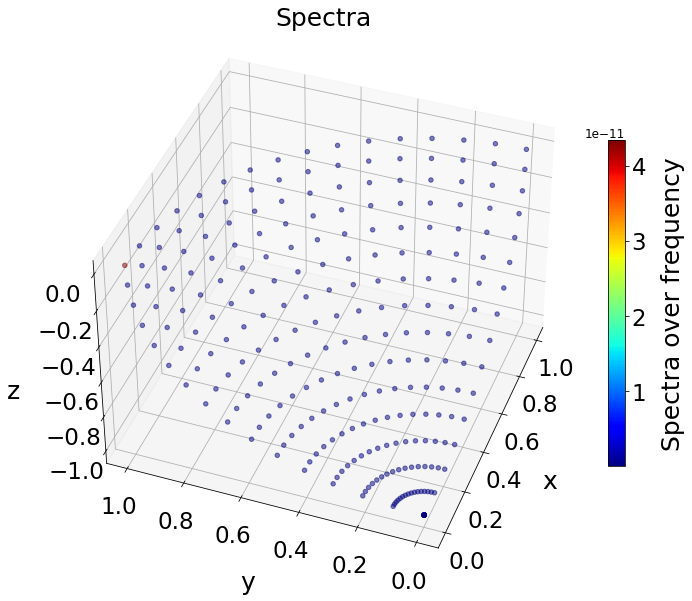

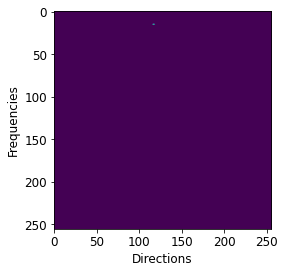

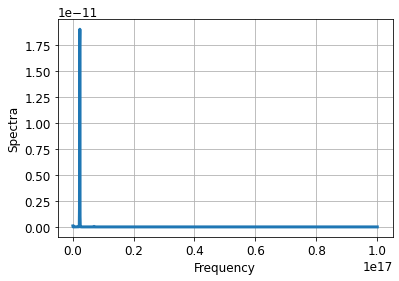

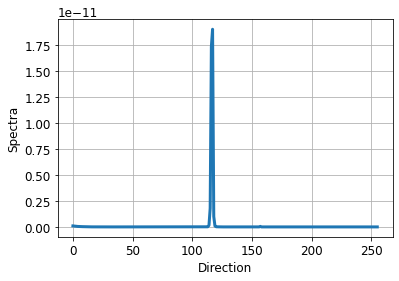

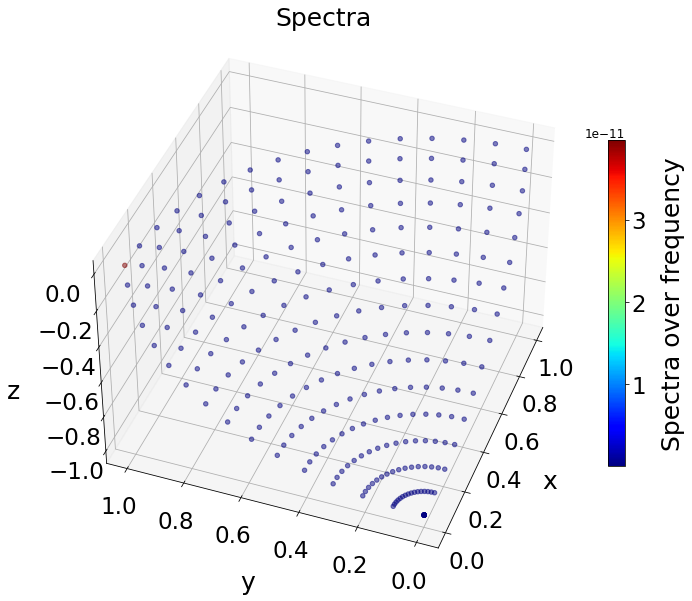

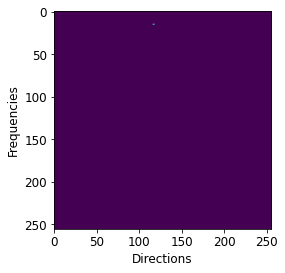

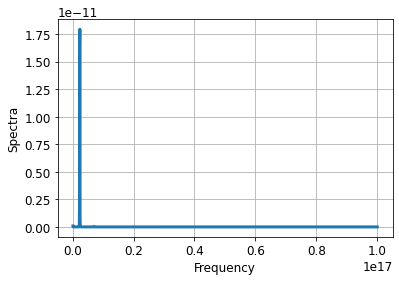

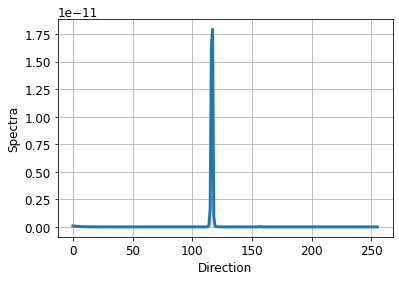

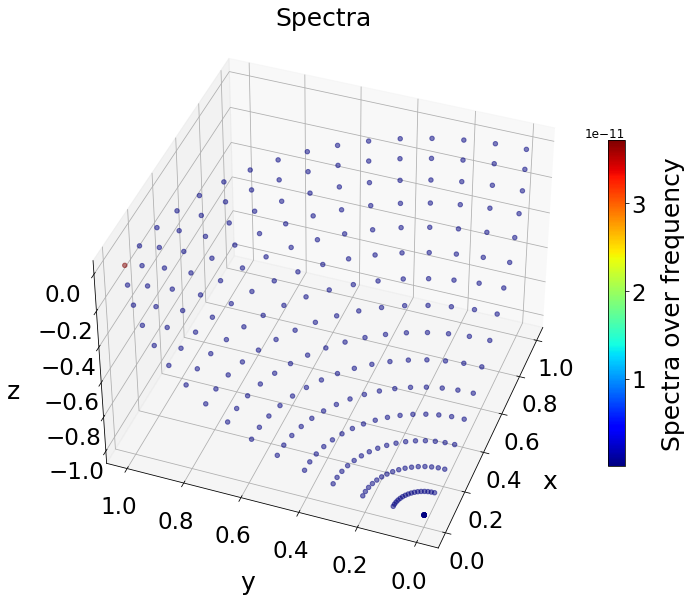

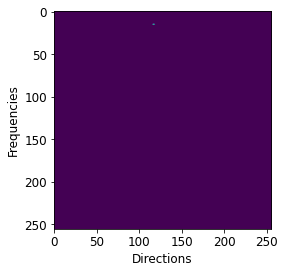

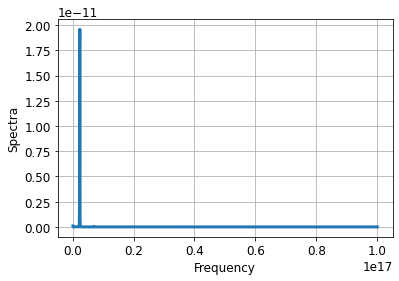

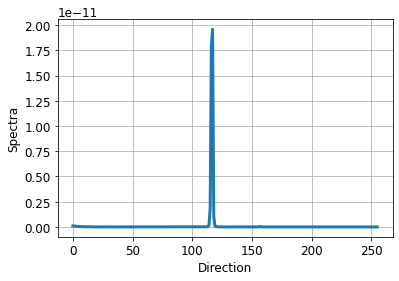

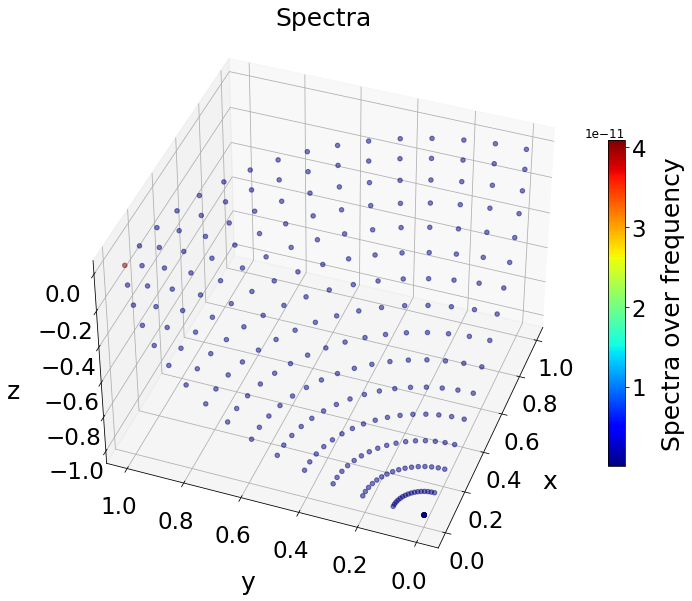

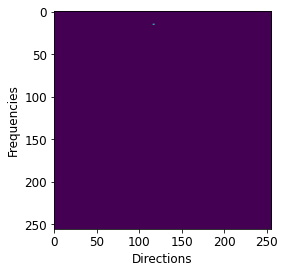

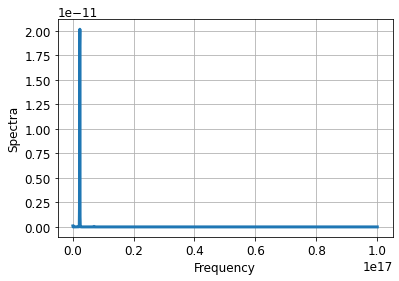

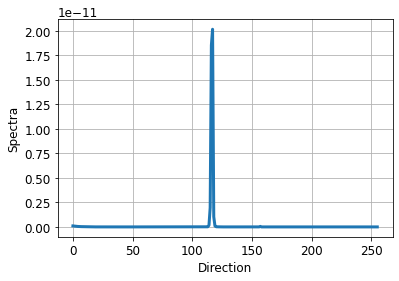

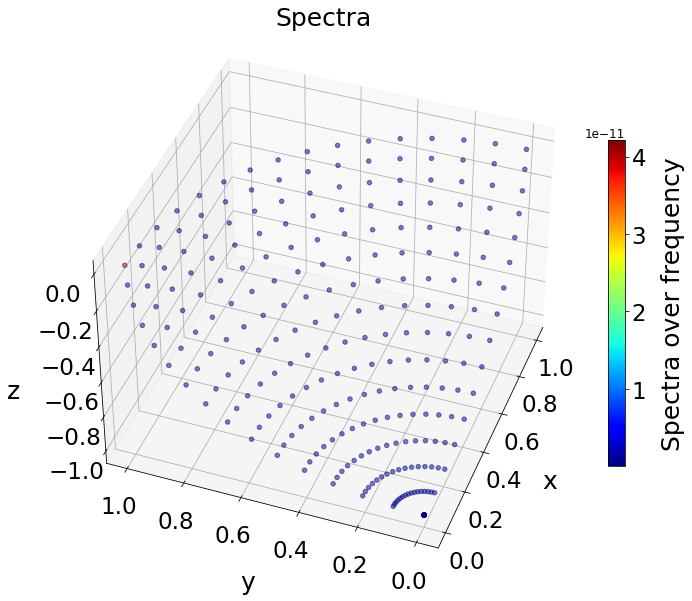

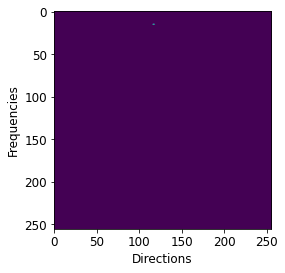

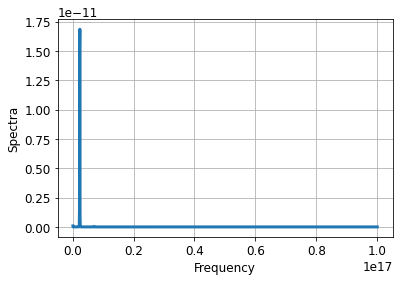

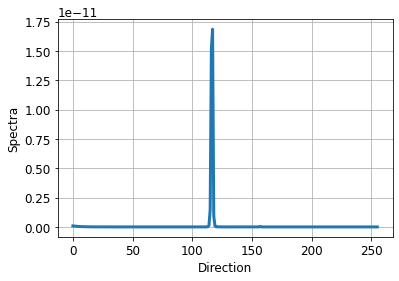

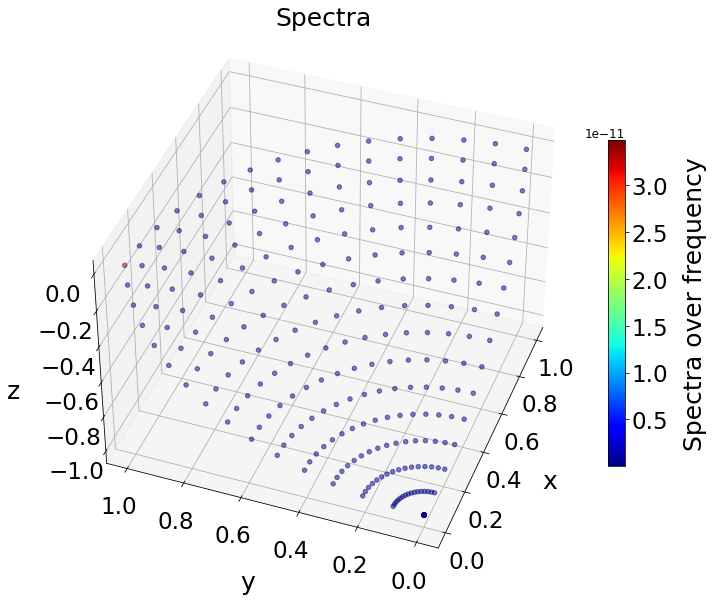

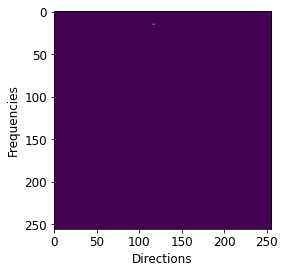

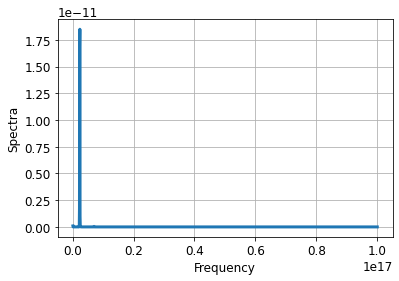

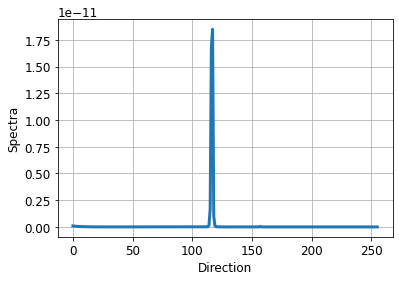

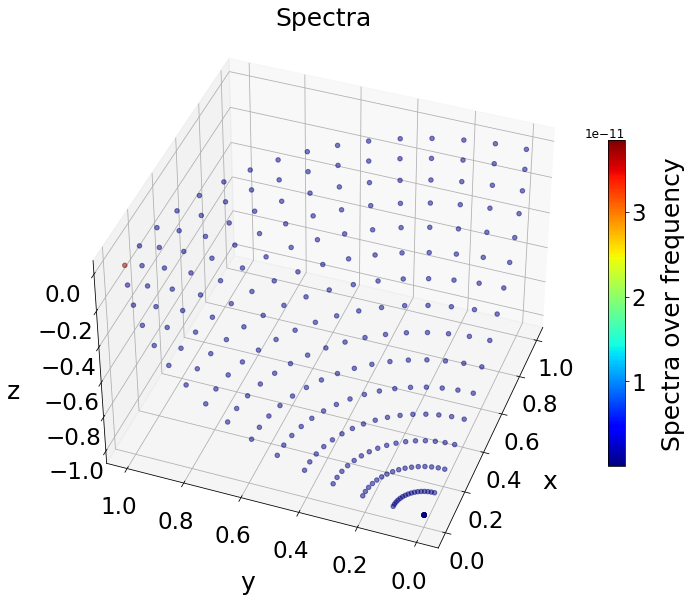

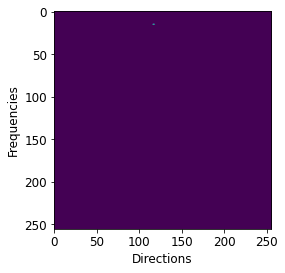

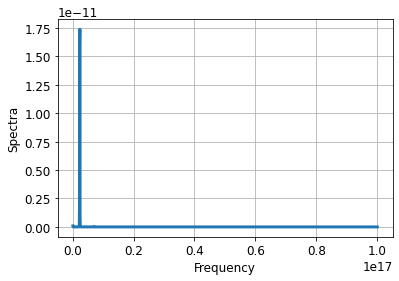

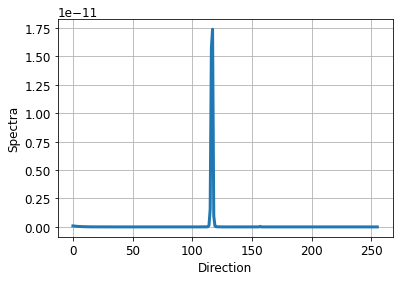

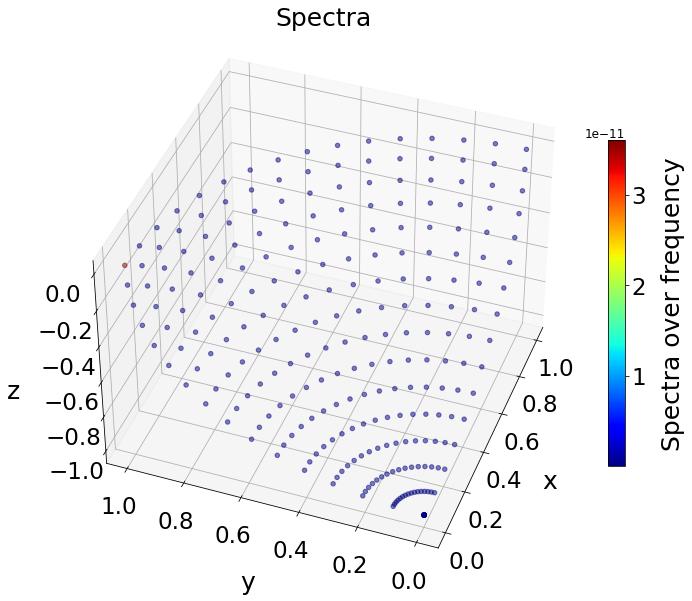

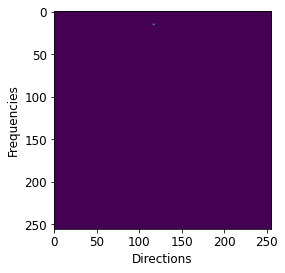

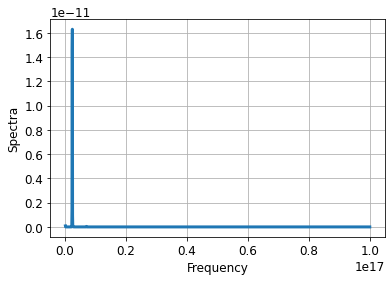

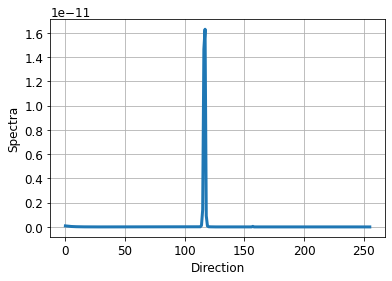

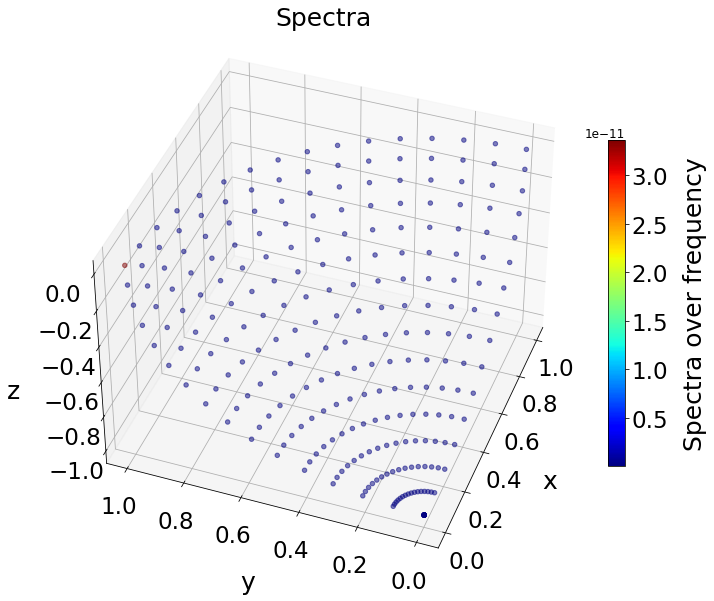

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as tick
from matplotlib import cm

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['lines.linewidth']=3
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

for radiation_sim in all_radiation:
    spectra = radiation_sim.get_Spectra()
    #1st dim: direction, 2nd dim: frequency
    plt.imshow(spectra)
    plt.xlabel('Directions')
    plt.ylabel('Frequencies')
    plt.show()
    
    integrate_over_direction = np.sum(spectra, axis=0)
    integrate_over_frequency = np.sum(spectra, axis=1)
    
    frequency = radiation_sim.get_omega()
    n_vec_directions = radiation_sim.get_vector_n()
    
    plt.plot(frequency, integrate_over_direction)
    plt.xlabel('Frequency')
    plt.ylabel('Spectra')
    plt.grid(True)
    plt.show()
    
    plt.plot(np.arange(0, integrate_over_direction.shape[0], 1), integrate_over_direction)
    plt.xlabel('Direction')
    plt.ylabel('Spectra')
    plt.grid(True)
    plt.show()
    
    fig = plt.figure(figsize=(24,10))
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    norm = matplotlib.colors.Normalize(vmin=np.min(integrate_over_frequency),
                                   vmax=np.max(integrate_over_frequency))

    ax.scatter(n_vec_directions[:,0], n_vec_directions[:, 1], n_vec_directions[:, 2], 
           c=plt.cm.jet(norm(integrate_over_frequency)), s=20, alpha=0.5)
    ax.view_init(40, 200)

    m = cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
    m.set_array([])
    cb = plt.colorbar(m, shrink=0.6, pad=0.01)
    cb.ax.tick_params(labelsize=23)
    cb.ax.get_yaxis().labelpad = 15
    cb.ax.set_ylabel('Spectra over frequency', fontsize=25)

    ax.set_xlabel('x', fontsize=25, linespacing=5.2)
    ax.set_ylabel('y', fontsize=25, linespacing=5.2)
    ax.set_zlabel('z', fontsize=25, linespacing=5.2)
    ax.dist = 10

    ax.xaxis.set_tick_params(labelsize=23)
    ax.yaxis.set_tick_params(labelsize=23)
    ax.zaxis.set_tick_params(labelsize=23)
    ax.xaxis.labelpad=30
    ax.yaxis.labelpad=30
    ax.zaxis.labelpad=30

    ax.tick_params(axis='both', which='major', pad=10)

    ax.xaxis._axinfo['label']['space_factor'] = 5.0
    ax.yaxis._axinfo['label']['space_factor'] = 5.0
    ax.zaxis._axinfo['label']['space_factor'] = 5.0

    ax.set_title('Spectra', fontsize=25)

    plt.show()

In [4]:
for f_ in paths_to_simulation_files:
    print(f_)
    iteration = f_.split('.')[0].split('_')[-4]
    print(iteration)
    f = h5.File(f_, 'r')
    h5_tree(f)
    dataAmpl_x_Im = f.get('data').get(iteration).get('DetectorMesh').get('Amplitude').get('x_Im')[:]
    dataAmpl_x_Re = f.get('data').get(iteration).get('DetectorMesh').get('Amplitude').get('x_Re')[:]
    dataAmpl_y_Im = f.get('data').get(iteration).get('DetectorMesh').get('Amplitude').get('y_Im')[:]
    dataAmpl_y_Re = f.get('data').get(iteration).get('DetectorMesh').get('Amplitude').get('y_Re')[:]
    dataAmpl_z_Im = f.get('data').get(iteration).get('DetectorMesh').get('Amplitude').get('z_Im')[:]
    dataAmpl_z_Re = f.get('data').get(iteration).get('DetectorMesh').get('Amplitude').get('z_Re')[:]

    dataDetector_x = f.get('data').get(iteration).get('DetectorMesh').get('DetectorDirection').get('x')[:]
    dataDetector_y = f.get('data').get(iteration).get('DetectorMesh').get('DetectorDirection').get('y')[:]
    dataDetector_z = f.get('data').get(iteration).get('DetectorMesh').get('DetectorDirection').get('z')[:]

    dataFreq = f.get('data').get(iteration).get('DetectorMesh').get('DetectorFrequency').get('omega')[:]
    
    print(dataAmpl_x_Im.shape)
    print(dataDetector_x.shape)
    print(dataFreq.shape)

/bigdata/hplsim/production/LWFA_radiation_new/LWFArad_data_example/LWFArad_data_example/radiationOpenPMD/e_radiation_11000_0_0_0.h5
11000
└── data
    └── 11000
        └── DetectorMesh
            ├── Amplitude
            │   ├── x_Im (256)
            │   ├── x_Re (256)
            │   ├── y_Im (256)
            │   ├── y_Re (256)
            │   ├── z_Im (256)
            │   └── z_Re (256)
            ├── DetectorDirection
            │   ├── x (256)
            │   ├── y (256)
            │   └── z (256)
            └── DetectorFrequency
                └── omega (1)
(256, 256, 1)
(256, 1, 1)
(1, 256, 1)
/bigdata/hplsim/production/LWFA_radiation_new/LWFArad_data_example/LWFArad_data_example/radiationOpenPMD/e_radiation_10900_0_0_0.h5
10900
└── data
    └── 10900
        └── DetectorMesh
            ├── Amplitude
            │   ├── x_Im (256)
            │   ├── x_Re (256)
            │   ├── y_Im (256)
            │   ├── y_Re (256)
            │   ├── z_Im (256)
            │  